In [1]:
import numpy as np, pandas as pd    #import numpy, pandas

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt, seaborn as sns   #plotting libraries
%matplotlib inline

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.shape, len(df.index), len(df.columns)   #number of rows and columns

((39717, 111), 39717, 111)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [6]:
#Checking columns, rows with all null values
df.isnull().all().sum(), df.isnull().all(axis=1).sum()

(54, 0)

---

# 1 Data Cleaning

## 1.1 Dropping Columns

In [8]:
df.columns[df.isnull().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

### 1.1.1 dropping columns with all null values

In [9]:
#dropping columns with all null values
df = df.drop(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], axis=1)

In [10]:
#percentage of missing values across columns
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)   

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
int_rate                       0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
term                           0.00
last_pymnt_amnt                0.00
initial_list_status            0.00
funded_amnt_inv             

### 1.1.2 Dropping high null values

In [11]:
#Dropping high null values
   #next payment date --- irrelevance to target variable
   #months since last public record --- irrelevance to target variable & insufficient publc record availability
   
df = df.drop(['next_pymnt_d', 'mths_since_last_record'], axis=1)
df.shape

(39717, 55)

### 1.1.3 dropping free text columns

In [12]:
#dropping free text columns
df=df.drop(['url','desc', 'title'],axis=1)    
df.shape

(39717, 52)

In [13]:
#Checking emp_title values
df.emp_title.value_counts() , df.emp_title.value_counts()/len(df.index)*100

(US Army                         134
 Bank of America                 109
 IBM                              66
 AT&T                             59
 Kaiser Permanente                56
                                ... 
 Orgill                            1
 White Mountain Country Club       1
 ewscripps                         1
 Quality Vision International      1
 M&D Supply                        1
 Name: emp_title, Length: 28820, dtype: int64,
 US Army                         0.337387
 Bank of America                 0.274442
 IBM                             0.166176
 AT&T                            0.148551
 Kaiser Permanente               0.140998
                                   ...   
 Orgill                          0.002518
 White Mountain Country Club     0.002518
 ewscripps                       0.002518
 Quality Vision International    0.002518
 M&D Supply                      0.002518
 Name: emp_title, Length: 28820, dtype: float64)

In [14]:
#dropping emp_title as it is free text and contribution is insignificant (highest being 0.33%) 
df=df.drop(['emp_title'],axis=1)
df.shape

(39717, 51)

### 1.1.4 dropping single value columns

In [15]:
#checking single value columns
df[['pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt']].value_counts()

pymnt_plan  initial_list_status  policy_code  application_type  acc_now_delinq  delinq_amnt
n           f                    1            INDIVIDUAL        0               0              39717
dtype: int64

In [16]:
#dropping single value columns
df=df.drop(['pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt'],axis=1)
df.shape

(39717, 45)

In [17]:
df[['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']].value_counts()

collections_12_mths_ex_med  chargeoff_within_12_mths  tax_liens
0.0                         0.0                       0.0          39661
dtype: int64

In [18]:
#dropping single value and null value columns
df=df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis=1)
df.shape

(39717, 42)

### 1.1.5 Dropping other unnecessary columns

In [19]:
#dropping columns which are after effects of charge off
df=df.drop(['recoveries','collection_recovery_fee'],axis=1)
df.shape

(39717, 40)

---

## 1.2 Handling nulls in rows

In [21]:
#Checking columns with any null values
print(df.isnull().sum().sort_values(ascending=False))
print('\n')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False))

mths_since_last_delinq    25682
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
last_credit_pull_d            2
last_pymnt_amnt               0
out_prncp                     0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp_inv                 0
earliest_cr_line              0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
inq_last_6mths                0
id                            0
member_id                     0
sub_grade                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
home_ownership                0
dti     

In [22]:
#Checking for rows with null value counts
df.isnull().sum(axis=1).sort_values(ascending=False)

16719    3
28547    3
13891    3
4714     3
24984    3
        ..
26126    0
26127    0
26128    0
26129    0
19858    0
Length: 39717, dtype: int64

### 1.2.1 removing rows with null values & low proportion of nulls in the column

In [23]:
#removing rows with null values in last_pymnt_d, last_credit_pull_d, last_credit_pull_d
df = df[~df.last_pymnt_d.isnull()]         #--- 0.18% null values
df = df[~df.revol_util.isnull()]           #--- 0.13% null values
df = df[~df.last_credit_pull_d.isnull()]   #--- 0.01% null values
df.shape

#loss of 119 records (0.3%)

(39598, 40)

### 1.2.2 null value imputation

In [24]:
df.pub_rec_bankruptcies.value_counts(), df.pub_rec_bankruptcies.value_counts()/len(df.index)

(0.0    37228
 1.0     1667
 2.0        7
 Name: pub_rec_bankruptcies, dtype: int64,
 0.0    0.940148
 1.0    0.042098
 2.0    0.000177
 Name: pub_rec_bankruptcies, dtype: float64)

In [25]:
#Imputing public record bankruptcies to '0' as the data is unavailable and 94% non-nulls have '0' value
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0])
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.astype('int64')

In [26]:
df.pub_rec_bankruptcies.value_counts(), df.pub_rec_bankruptcies.value_counts()/len(df.index)

(0    37924
 1     1667
 2        7
 Name: pub_rec_bankruptcies, dtype: int64,
 0    0.957725
 1    0.042098
 2    0.000177
 Name: pub_rec_bankruptcies, dtype: float64)

In [27]:
df.emp_length.value_counts(), df.emp_length.value_counts()/len(df.index)

(10+ years    8869
 < 1 year     4563
 2 years      4377
 3 years      4084
 4 years      3422
 5 years      3268
 1 year       3225
 6 years      2225
 7 years      1769
 8 years      1474
 9 years      1255
 Name: emp_length, dtype: int64,
 10+ years    0.223976
 < 1 year     0.115233
 2 years      0.110536
 3 years      0.103137
 4 years      0.086419
 5 years      0.082529
 1 year       0.081444
 6 years      0.056190
 7 years      0.044674
 8 years      0.037224
 9 years      0.031694
 Name: emp_length, dtype: float64)

In [28]:
df.emp_length.isnull().sum()

1067

In [29]:
df.emp_length = df.emp_length.fillna('unknown')

In [30]:
df.emp_length.value_counts(), df.emp_length.value_counts()/len(df.index)

(10+ years    8869
 < 1 year     4563
 2 years      4377
 3 years      4084
 4 years      3422
 5 years      3268
 1 year       3225
 6 years      2225
 7 years      1769
 8 years      1474
 9 years      1255
 unknown      1067
 Name: emp_length, dtype: int64,
 10+ years    0.223976
 < 1 year     0.115233
 2 years      0.110536
 3 years      0.103137
 4 years      0.086419
 5 years      0.082529
 1 year       0.081444
 6 years      0.056190
 7 years      0.044674
 8 years      0.037224
 9 years      0.031694
 unknown      0.026946
 Name: emp_length, dtype: float64)

## 1.3 Fixing value formats

### 1.3.1 Converting percentages to float

In [32]:
print(pd.value_counts(df.int_rate))
print('\n')
print(pd.value_counts(df.revol_util))

10.99%    956
13.49%    824
11.49%    821
7.51%     786
7.88%     725
         ... 
24.40%      1
17.44%      1
16.01%      1
21.48%      1
16.71%      1
Name: int_rate, Length: 371, dtype: int64


0%        975
0.20%      62
63%        62
66.70%     58
0.10%      58
         ... 
17.71%      1
5.34%       1
0.49%       1
24.89%      1
0.83%       1
Name: revol_util, Length: 1089, dtype: int64


In [33]:
df[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39716
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   int_rate    39598 non-null  object
 1   revol_util  39598 non-null  object
dtypes: object(2)
memory usage: 928.1+ KB


In [34]:
#converting percentage to float
df.int_rate = df.int_rate.apply(lambda x: float(x[:-1])*0.01)
df.revol_util = df.revol_util.apply(lambda x: float(str(x)[:-1])*0.01)

In [35]:
print(pd.value_counts(df.int_rate))
print('\n')
print(pd.value_counts(df.revol_util))

0.1099    956
0.1349    824
0.1149    821
0.0751    786
0.0788    725
         ... 
0.1744      1
0.1467      1
0.2459      1
0.1836      1
0.1696      1
Name: int_rate, Length: 371, dtype: int64


0.0000    975
0.6300     62
0.0020     62
0.0010     58
0.6670     58
         ... 
0.2841      1
0.0534      1
0.2465      1
0.0264      1
0.0188      1
Name: revol_util, Length: 1089, dtype: int64


### 1.3.2 Handling Dates

In [38]:
#Converting dates to datetime format & splitting to month and year
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_yr']=df['issue_d'].dt.year
df['issue_mth']=df['issue_d'].dt.month

df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df['earliest_cr_line_yr']=df['earliest_cr_line'].dt.year
df['earliest_cr_line_mth']=df['earliest_cr_line'].dt.month

df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df['last_pymnt_yr']=df['last_pymnt_d'].dt.year
df['last_pymnt_mth']=df['last_pymnt_d'].dt.month

df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')
df['last_credit_pull_yr']=df['last_credit_pull_d'].dt.year
df['last_credit_pull_mth']=df['last_credit_pull_d'].dt.month

In [39]:
df.dtypes

id                                 int64
member_id                          int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
zip_code                          object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line          datetime64[ns]
inq_last_6mths                     int64
mths_since_last_delinq           float64
open_acc        

In [45]:
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')   #darkgrid, whitegrid, dark, white, ticks

---

---

## Univariate Analysis

### Univariate Analysis on Categorical Variables

---

#### loan_status, term

<function matplotlib.pyplot.show(close=None, block=None)>

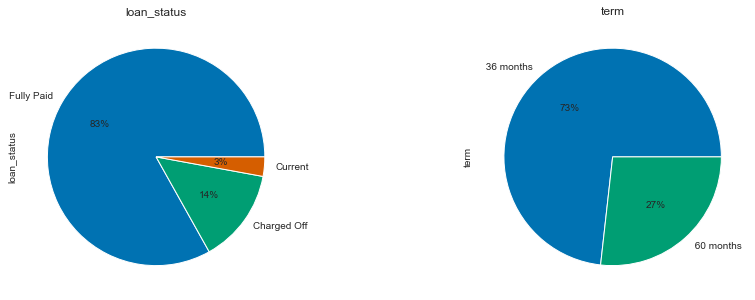

In [120]:
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
df.loan_status.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('loan_status', fontsize=12)

plt.subplot(1, 2, 2)
df.term.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('term', fontsize=12)

plt.show

---

#### grade

<function matplotlib.pyplot.show(close=None, block=None)>

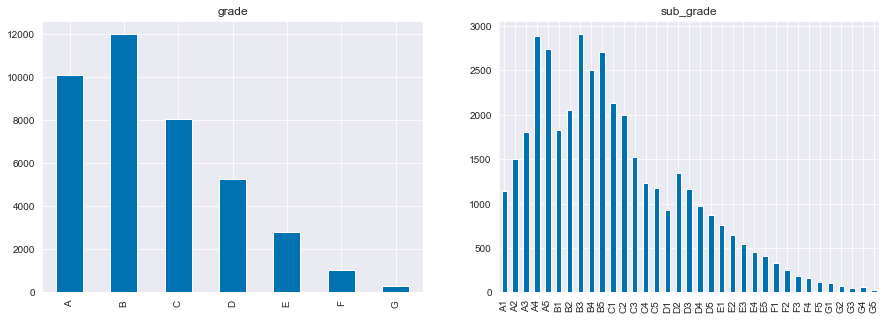

In [119]:
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
grade_order=sorted(list(df.grade.unique()))
df.grade.value_counts().reindex(grade_order).plot.bar()
plt.title('grade', fontsize=12)

plt.subplot(1, 2, 2)
df.sub_grade.value_counts().reindex(sorted(list(df.sub_grade.unique()))).plot.bar()
plt.title('sub_grade', fontsize=12)

plt.show

##### Observation:
1. Even though loan application acceptance decreases with decrease in grade, however grade B has a higher frequency than A. This could be because grade A are more affluent and fewer people need a loan.
2. Withing grades A & B, number of loan application acceptance increases with decrease in subgrades, while for C and lower, the acceptance decrease with decrease in sub-grades. A reason could be that for grades A & B, loans are accepted irrespective of subgrades and more applications are received with decreasing sub grades, whereas for C & below, sub grades have an impact on application acceptance.

---

#### emp_length, home_ownership

In [52]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'unknown'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

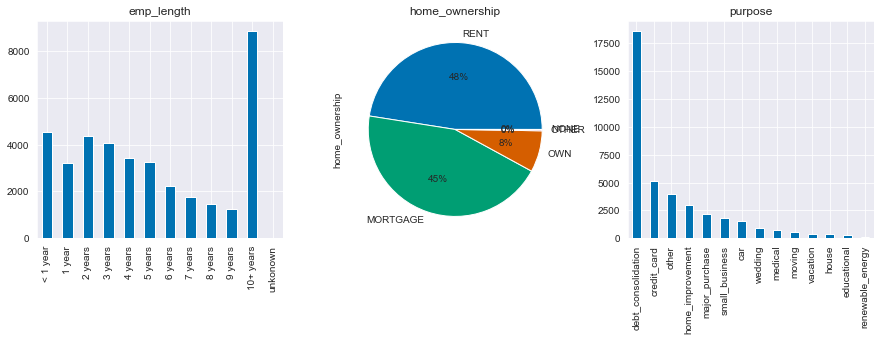

In [128]:
plt.figure(figsize=[15,4])

plt.subplot(1, 3, 1)
emp_length_order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years','unkonown']
df.emp_length.value_counts().reindex(emp_length_order).plot.bar()
plt.title('emp_length', fontsize=12)

plt.subplot(1, 3, 2)
df.home_ownership.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('home_ownership', fontsize=12)

plt.subplot(1, 3, 3)
df.purpose.value_counts().plot.bar()
plt.title('purpose', fontsize=12)

plt.show

##### Observation:
- emp_length <br>
Loan applications accepted generally decreases with increase in years if employment, indicating more need of loan in early years of employment.
10+ years has a peak possibly because all 10+ years are bucketed into this category
-home_ownership
Customers with rented and mortgaged house apply and get accepted for loan the most
- Most loans are for debt consolidation
##### Recommendation:
More marketing & sales efforts on employees with <5 years of experience and customers with rented and mortgaged houses

---

#### addr_state

<function matplotlib.pyplot.show(close=None, block=None)>

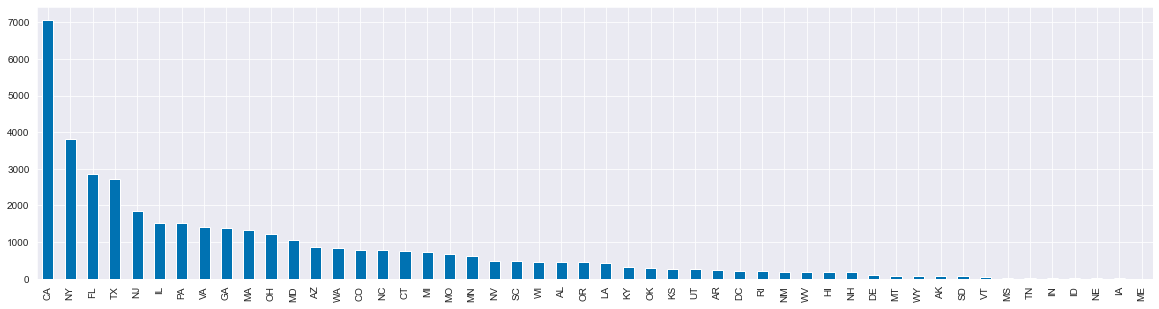

In [133]:
plt.figure(figsize=[20,5])
df.addr_state.value_counts().plot.bar()
plt.show

#### Observation
Highest number of loans from CA

#### Bureau data

<function matplotlib.pyplot.show(close=None, block=None)>

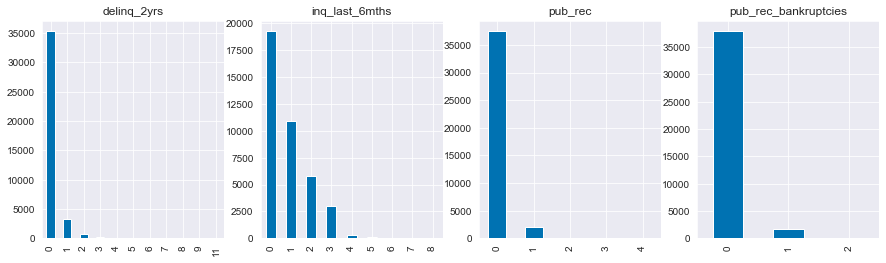

In [148]:
plt.figure(figsize=[15,4])

plt.subplot(1, 4, 1)
df.delinq_2yrs.value_counts().plot.bar()
plt.title('delinq_2yrs', fontsize=12)

plt.subplot(1, 4, 2)
df.inq_last_6mths.value_counts().plot.bar()
plt.title('inq_last_6mths', fontsize=12)

plt.subplot(1, 4, 3)
df.pub_rec.value_counts().plot.bar()
plt.title('pub_rec', fontsize=12)

plt.subplot(1, 4, 4)
df.pub_rec_bankruptcies.value_counts().plot.bar()
plt.title('pub_rec_bankruptcies', fontsize=12)

plt.show

#### Observation: 
Loan applications are almost always being accepted for customers with no derog records 

<function matplotlib.pyplot.show(close=None, block=None)>

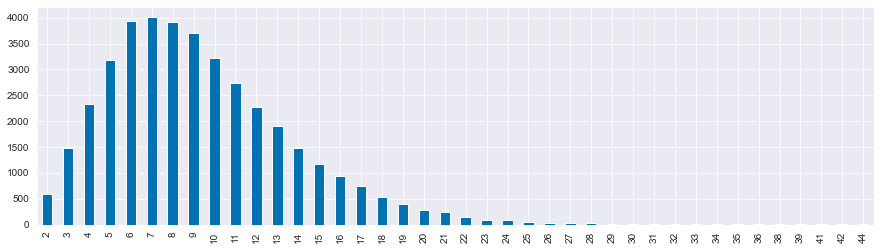

In [150]:
plt.figure(figsize=[15,4])
df.open_acc.value_counts().reindex(sorted(list(df.open_acc.unique()))).plot.bar()
plt.show

Observation: Loan acceptance have a tendency towards 7 open accounts on credit file

---

### Univariate Analysis on Quantitative Variables

<function matplotlib.pyplot.show(close=None, block=None)>

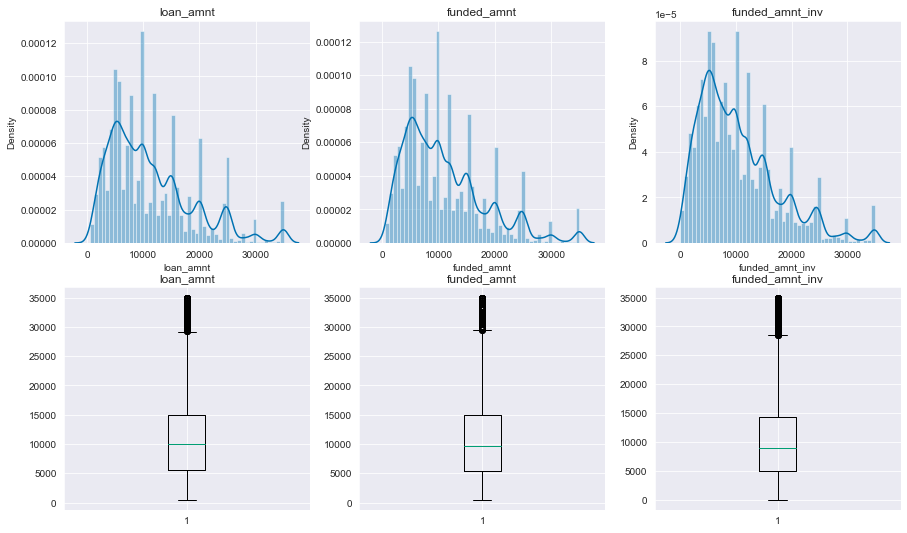

In [290]:
plt.figure(figsize=[15,9])

plt.subplot(2, 3, 1)
sns.distplot(df.loan_amnt)
plt.title('loan_amnt', fontsize=12)

plt.subplot(2, 3, 2)
sns.distplot(df.funded_amnt)
plt.title('funded_amnt', fontsize=12)

plt.subplot(2, 3, 3)
sns.distplot(df.funded_amnt_inv)
plt.title('funded_amnt_inv', fontsize=12)

plt.subplot(2, 3, 4)
plt.boxplot(df.loan_amnt)
plt.title('loan_amnt', fontsize=12)

plt.subplot(2, 3, 5)
plt.boxplot(df.funded_amnt)
plt.title('funded_amnt', fontsize=12)

plt.subplot(2, 3, 6)
plt.boxplot(df.funded_amnt_inv)
plt.title('funded_amnt_inv', fontsize=12)


plt.show

##### Observations:
1. There are peaks at intervals possibly due to rounding off
2. Most loan amounts are in the range of IQR(5000-15000), however funded_amnt_inv is skewed towards lower values, suggesting reduction of loan_amnt

<function matplotlib.pyplot.show(close=None, block=None)>

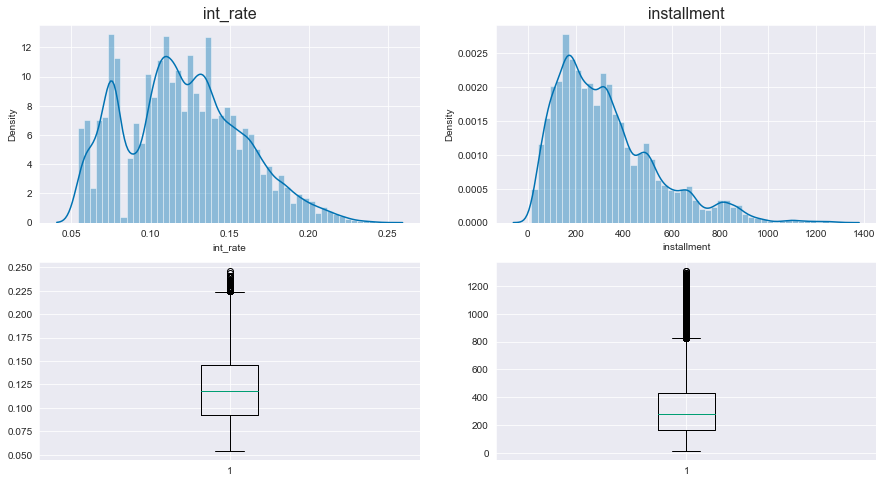

In [295]:
plt.figure(figsize=[15,8])

plt.subplot(2,2,1)
sns.distplot(df.int_rate)
plt.title('int_rate', fontsize=16)

plt.subplot(2,2,2)
sns.distplot(df.installment)
plt.title('installment', fontsize=16)

plt.subplot(2,2,3)
plt.boxplot(df.int_rate)

plt.subplot(2,2,4)
plt.boxplot(df.installment)

plt.show

##### Observation:
Very few loans given at 8% int rate. What could be the reason?

## Customer profile

Text(0.5, 1.0, 'annual_inc')

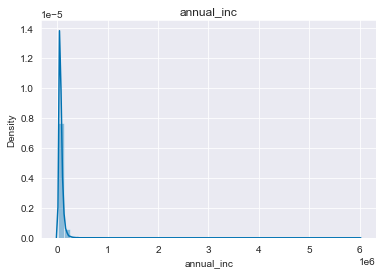

In [231]:
sns.distplot(df.annual_inc)
plt.title('annual_inc', fontsize=12)

In [253]:
df.annual_inc.describe(percentiles=list(np.arange(0,1,0.05)))

count    3.959800e+04
mean     6.903508e+04
std      6.382858e+04
min      4.000000e+03
0%       4.000000e+03
5%       2.400000e+04
10%      3.000000e+04
15%      3.400000e+04
20%      3.762000e+04
25%      4.063250e+04
30%      4.500000e+04
35%      4.800000e+04
40%      5.040000e+04
45%      5.500000e+04
50%      5.900000e+04
55%      6.200000e+04
60%      6.600000e+04
65%      7.100000e+04
70%      7.563420e+04
75%      8.250000e+04
80%      9.000000e+04
85%      1.000000e+05
90%      1.160000e+05
95%      1.420000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

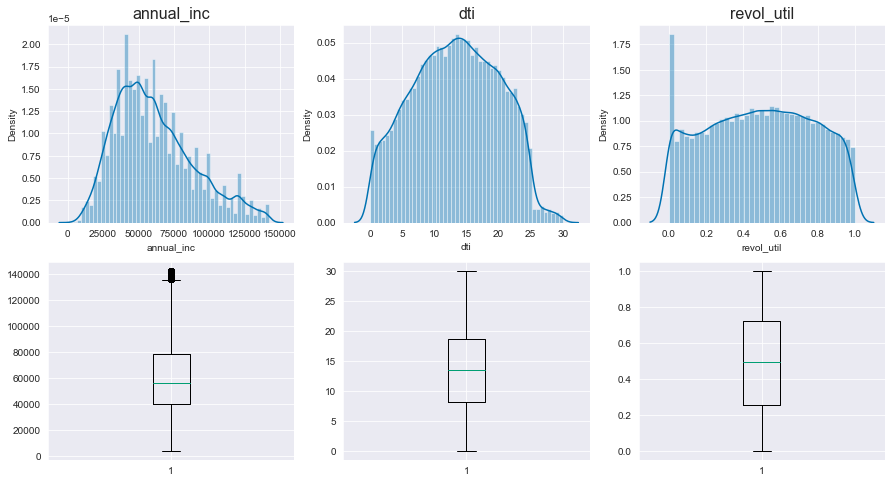

In [301]:
plt.figure(figsize=[15,8])

plt.subplot(2,3,1)
sns.distplot(df[df.annual_inc <= 1.420000e+05].annual_inc)
plt.title('annual_inc', fontsize=16)

plt.subplot(2,3,2)
sns.distplot(df.dti)
plt.title('dti', fontsize=16)

plt.subplot(2,3,3)
sns.distplot(df.revol_util)
plt.title('revol_util', fontsize=16)

plt.subplot(2,3,4)
plt.boxplot(df[df.annual_inc <= 1.420000e+05].annual_inc)   #removing outliers

plt.subplot(2,3,5)
plt.boxplot(df.dti)

plt.subplot(2,3,6)
plt.boxplot(df.revol_util)

plt.show

##### Observations:
1. Spikes in annual income because of round offs
2. Maximum loans are given for dti and revol_util towards zero
3. revol_util seems to have a uniform distribution, so no relationship with loan data other than the spike at zero

---

### Dates

<function matplotlib.pyplot.show(close=None, block=None)>

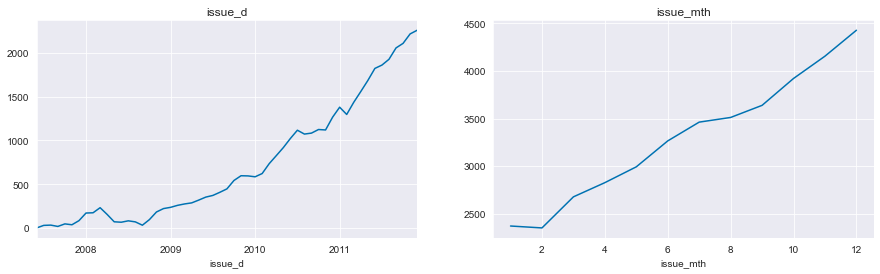

In [196]:
plt.figure(figsize=[15,4])

plt.subplot(1, 2, 1)
df.groupby(['issue_d'])['id'].count().plot()
plt.title('issue_d', fontsize=12)

plt.subplot(1, 2, 2)
df.groupby(['issue_mth'])['id'].count().plot()
plt.title('issue_mth', fontsize=12)

plt.show

#### Observations
1. Almost linear growth in loans since 2009
2. Almost linear growth in loans starting March throughout Dec
3. Slope: Jan-Feb least number of loans issued| March-May, Jul-Sep growth rates of loan issuance are slower than May-Jul, Sep-Dec

<function matplotlib.pyplot.show(close=None, block=None)>

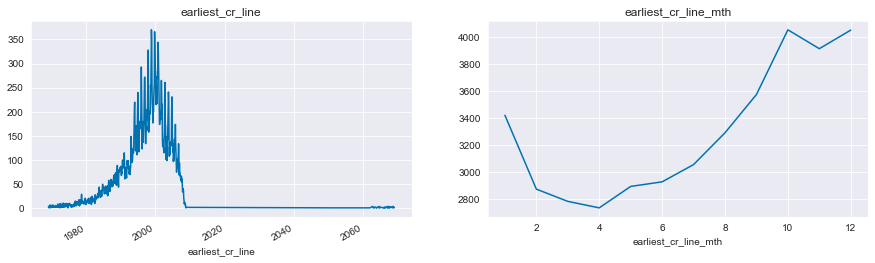

In [198]:
plt.figure(figsize=[15,4])

plt.subplot(1, 2, 1)
df.groupby(['earliest_cr_line'])['id'].count().plot()
plt.title('earliest_cr_line', fontsize=12)

plt.subplot(1, 2, 2)
df.groupby(['earliest_cr_line_mth'])['id'].count().plot()
plt.title('earliest_cr_line_mth', fontsize=12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

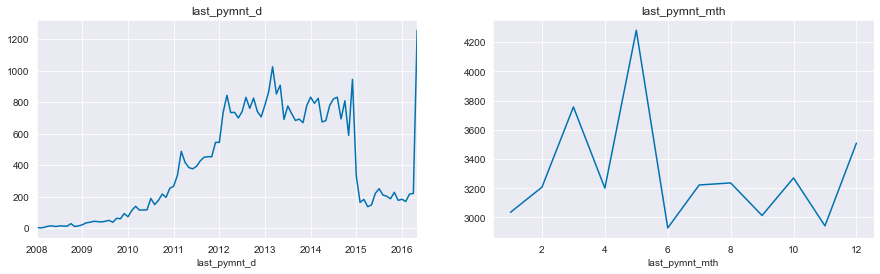

In [199]:
plt.figure(figsize=[15,4])

plt.subplot(1, 2, 1)
df.groupby(['last_pymnt_d'])['id'].count().plot()
plt.title('last_pymnt_d', fontsize=12)

plt.subplot(1, 2, 2)
df.groupby(['last_pymnt_mth'])['id'].count().plot()
plt.title('last_pymnt_mth', fontsize=12)

plt.show

---

---

## Bivariate Analysis

---

### Bivariate Analysis - Categorical vs categorical variables

### Grade

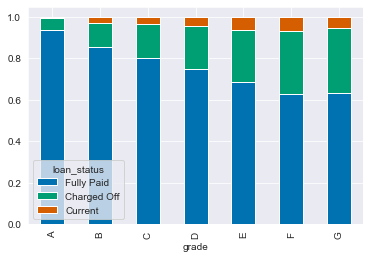

In [303]:
pivot_ = pd.pivot_table(data=df,values='id',index='grade',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

### sub_grade vs loan_status

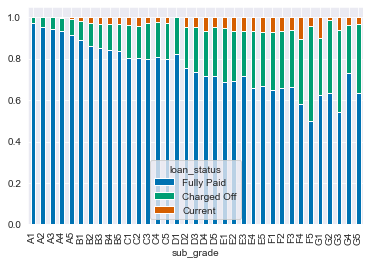

In [308]:
pivot_ = pd.pivot_table(data=df,values='id',index='sub_grade',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

#### Observation:
Chargeoff frequency increases with decline in grades

### emp_length vs loan_status

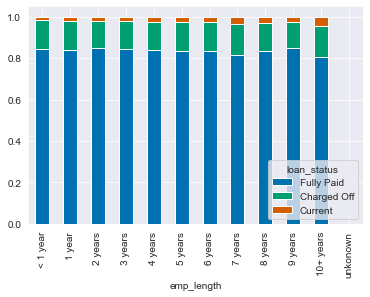

In [309]:
pivot_ = pd.pivot_table(data=df,values='id',index='emp_length',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.reindex(emp_length_order).plot(kind='bar', stacked=True)   #emp_length_order list declared earlier
plt.show()

### home_ownership vs loan_status

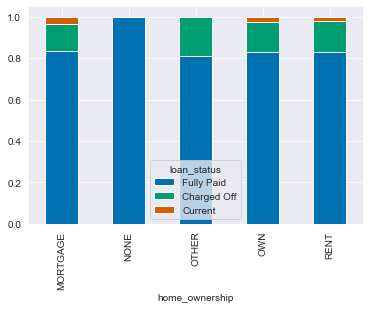

In [310]:
pivot_ = pd.pivot_table(data=df,values='id',index='home_ownership',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

### verification_status vs loan_status

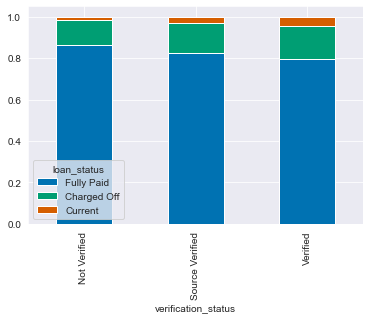

In [311]:
pivot_ = pd.pivot_table(data=df,values='id',index='verification_status',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

#### Observation:
Surprisingly non verified accounts have lower default rates

### purpose vs loan_status

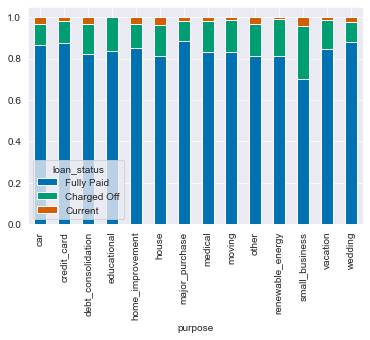

In [312]:
pivot_ = pd.pivot_table(data=df,values='id',index='purpose',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

#### Observation:
Purpose with small_business have a very high rate of delinquency

### addr_state vs loan_status

In [353]:
df.addr_state.value_counts()

CA    7071
NY    3803
FL    2862
TX    2715
NJ    1842
IL    1522
PA    1511
VA    1403
GA    1396
MA    1339
OH    1217
MD    1044
AZ     876
WA     839
CO     791
NC     785
CT     750
MI     719
MO     683
MN     612
NV     496
SC     472
WI     458
AL     450
OR     450
LA     436
KY     324
OK     299
KS     270
UT     258
AR     244
DC     212
RI     198
NM     189
WV     176
HI     173
NH     171
DE     113
MT      85
WY      83
AK      80
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

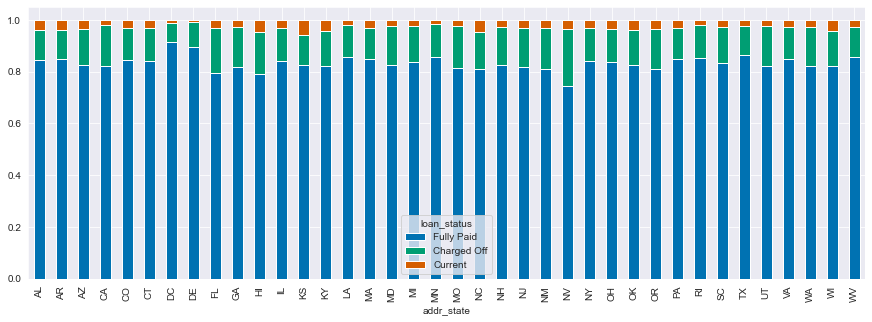

In [386]:
#removing states with frequency <100
ls_states=['CA','NY','FL','TX','NJ','IL','PA','VA','GA','MA','OH','MD','AZ','WA','CO','NC','CT','MI','MO','MN','NV','SC','WI','AL','OR','LA','KY','OK','KS','UT','AR','DC','RI','NM','WV','HI','NH','DE']
df_states=df.loc[df.addr_state.isin(ls_states),:]

pivot_ = pd.pivot_table(data=df_states,values='id',index='addr_state',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(df_states.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 5)
plt.show()

#### Observation:
NV has the highest default rate followed by FL

### Bivariate Analysis - Categorical vs numeric variables

<function matplotlib.pyplot.show(close=None, block=None)>

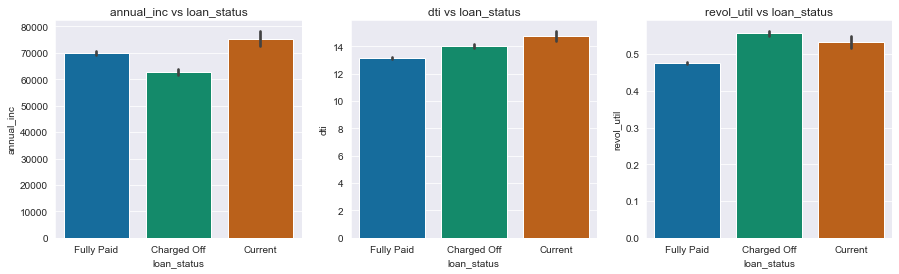

In [397]:
plt.figure(figsize=[15,4])

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='loan_status', y='annual_inc')
plt.title('annual_inc vs loan_status', fontsize=12)

plt.subplot(1, 3, 2)
sns.barplot(data=df, x='loan_status', y='dti')
plt.title('dti vs loan_status', fontsize=12)

plt.subplot(1, 3, 3)
sns.barplot(data=df, x='loan_status', y='revol_util')
plt.title('revol_util vs loan_status', fontsize=12)

plt.show

#### Observations
1. Delinquency is high for lower annual income
2. Higher DTI for Charged off customers opposed to Fully paid
3. Charge off frequencues higher for high revol_util